# Create effect size vs. t-test p-value plots

In [4]:
import warnings
warnings.filterwarnings('ignore')

import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import pandas as pd
import sklearn
import umap
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from collections import Counter

import torch
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Day 0

## Process beta cell fractions

In [2]:
base_dir = "/data/gl/g2/sachit/data/veres/perturbations/2_400_kegg_001500_seed_1_real/all_tfs/d0/"
filenames=os.listdir(base_dir)

In [3]:
files=[]
for elt in filenames:
    if "2-over" in elt:
        files.append(elt)
files.sort()

In [4]:
genes=[]
for elt in files:
    genes.append(elt.split("-")[0])

In [5]:
len(files)

263

In [3]:
differences=[]
paired_t=[]
beta_dist = []
for elt in files:
    results=torch.load(base_dir+elt)
    beta_counts_std = []
    for labs in results["unperturbed_labs"]:
        beta_counts_std.append(Counter(labs[-1])["sc_beta"]/200)
    beta_counts_perturb = []
    for labs in results["perturbed_labs"]:
        beta_counts_perturb.append(Counter(labs[-1])["sc_beta"]/200)

    #beta_dist.append(np.array([beta_counts_std, beta_counts_perturb]))
    differences.append(np.array(beta_counts_perturb)/np.array(beta_counts_std))
    paired_t.append(scipy.stats.ttest_rel(np.array(beta_counts_perturb), np.array(beta_counts_std))[1])

In [ ]:
torch.save({
    "gene_order": genes,
    "differences": differences,
    "p-val": paired_t
}, "/data/gl/g2/sachit/data/veres/perturbations/2_400_kegg_001500_seed_1_real/all_tfs_results/d4/beta_cell-2-over.pt")

## Load pts and plot

In [8]:
beta=torch.load("/data/gl/g2/sachit/data/veres/perturbations/2_400_kegg_001500_seed_1_real/all_tfs_results/d0/beta_cell-2-over.pt")

In [9]:
genes=beta["gene_order"]
differences=beta["differences"]
paired_t=beta["p-val"]

In [10]:
df=pd.DataFrame({"log2(fold-change)": np.log2(np.average(differences, -1)), "log10(p-value)": paired_t, "genes":genes})

In [11]:
df

,log2(fold-change),log10(p-value),genes
0,-0.412841,1.678090e-02,ARX
1,-0.763762,1.466332e-08,ASCL1
2,0.868564,1.731242e-05,ASCL2
3,0.011757,8.759659e-01,ATF3
4,-0.040332,2.228684e-01,ATOH1
...,...,...,...
258,0.144706,2.213679e-01,ZNF703
259,0.072522,3.535976e-01,ZNF732
260,0.021829,8.928739e-01,ZNF750
261,-0.039989,4.401575e-01,ZNF774


In [16]:
df.loc[(df['log2(fold-change)'] >= .1) & (df['log10(p-value)'] <  0.001), 'sig'] = "over"  # upregulated
#df.loc[(df['log2(fold-change)'] <= -.5) & (df['log10(p-value)'] < 0.05), 'sig'] = "under"   # downregulated
#df.loc[df['log10(p-value)'] < 0.05, 'sig'] = "over"  # upregulated
#df.loc[df['log10(p-value)'] < 0.05, 'sig'] = "under"   # downregulated
df['sig'].fillna('na', inplace=True) # intermediate
significant=df.loc[(df['log10(p-value)'] < 0.01) & (df['log2(fold-change)']>=.5)].index

500

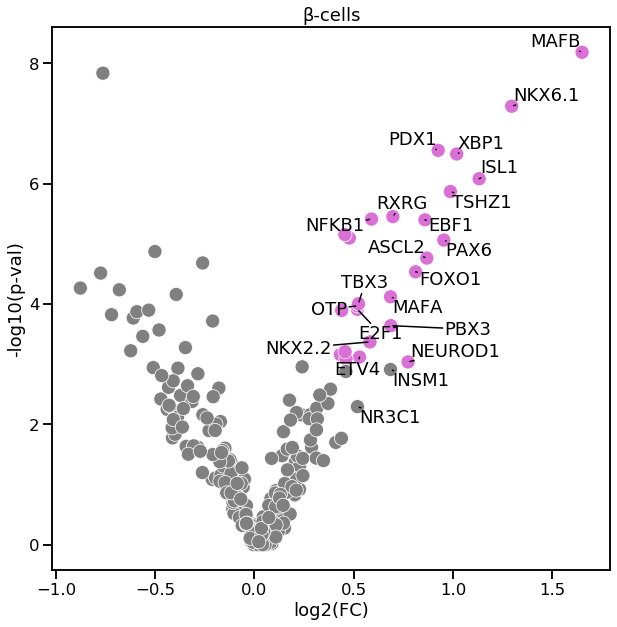

In [17]:
from adjustText import adjust_text
fig, ax = plt.subplots(figsize=(10,10))
sns.set_context("talk")
mypal=["grey","orchid",]
pl=sns.scatterplot(x=df["log2(fold-change)"], y=-np.log10(df["log10(p-value)"]), hue=df["sig"],palette=mypal,s=200,legend=False)
#ax.set_xlim(-1.7,1.7)
ax.set_xlabel("log2(FC)")
ax.set_ylabel("-log10(p-val)")
ax.set_title("β-cells")
text=[plt.text(df["log2(fold-change)"][idx], -np.log10(df["log10(p-value)"])[idx], genes[idx], ha='center', va="center") for idx in significant]
adjust_text(text, arrowprops=dict(arrowstyle='-', color='black'), ax=ax, precision=0.001)

## Process alpha cell fractions

In [ ]:
differences=[]
paired_t=[]
beta_dist = []
for elt in files:
    results=torch.load(base_dir+elt)
    beta_counts_std = []
    for labs in results["unperturbed_labs"]:
        beta_counts_std.append(Counter(labs[-1])["sc_alpha"]/200)
    beta_counts_perturb = []
    for labs in results["perturbed_labs"]:
        beta_counts_perturb.append(Counter(labs[-1])["sc_alpha"]/200)

    #beta_dist.append(np.array([beta_counts_std, beta_counts_perturb]))
    differences.append(np.array(beta_counts_perturb)/np.array(beta_counts_std))
    paired_t.append(scipy.stats.ttest_rel(np.array(beta_counts_perturb), np.array(beta_counts_std))[1])

In [21]:
torch.save({
    "gene_order": genes,
    "differences": differences,
    "p-val": paired_t
}, "/data/gl/g2/sachit/data/veres/perturbations/2_400_kegg_001500_seed_1_real/all_tfs_results/d4/alpha_cell-2-over.pt")

## Load pts and plot

In [5]:
alpha=torch.load("/data/gl/g2/sachit/data/veres/perturbations/2_400_kegg_001500_seed_1_real/all_tfs_results/d0/alpha_cell-2-over.pt")

In [6]:
genes=alpha["gene_order"]
differences=alpha["differences"]
paired_t=alpha["p-val"]

In [7]:
df=pd.DataFrame({"log2(fold-change)": np.log2(np.average(differences, -1)), "log10(p-value)": paired_t, "genes":genes})

In [8]:
df.loc[(df['log2(fold-change)'] >= .1) & (df['log10(p-value)'] <  0.01), 'sig'] = "over"  # upregulated
df['sig'].fillna('na', inplace=True) # intermediate
significant=df.loc[(df['log10(p-value)'] < 0.001) & (df['log2(fold-change)']>=.1)].index

500

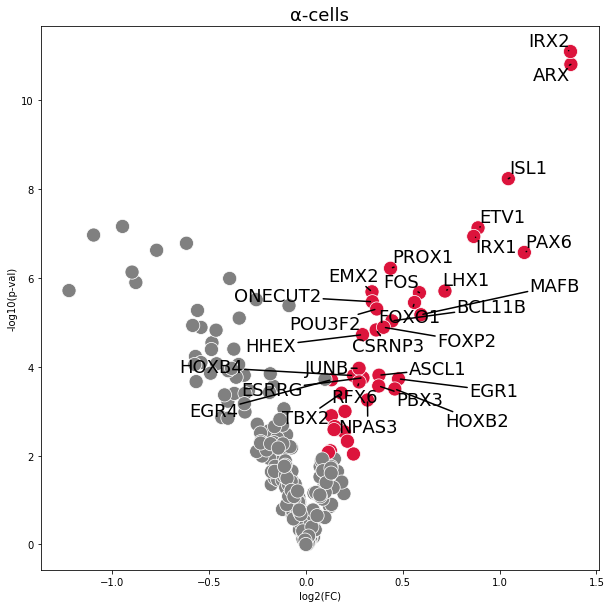

In [9]:
from adjustText import adjust_text
fig, ax = plt.subplots(figsize=(10,10))
sns.set_context("talk")
mypal=["crimson","grey"]
pl=sns.scatterplot(x=df["log2(fold-change)"], y=-np.log10(df["log10(p-value)"]), hue=df["sig"],palette=mypal,s=200,legend=False)
#ax.set_xlim(-1.7,1.7)
ax.set_xlabel("log2(FC)")
ax.set_ylabel("-log10(p-val)")
ax.set_title("α-cells")
text=[plt.text(df["log2(fold-change)"][idx], -np.log10(df["log10(p-value)"])[idx], genes[idx], ha='center', va="center") for idx in significant]
adjust_text(text, arrowprops=dict(arrowstyle='-', color='black'), ax=ax, precision=0.001)

## Process EC cell fractions

In [ ]:
differences=[]
paired_t=[]
beta_dist = []
for elt in files:
    results=torch.load(base_dir+elt)
    beta_counts_std = []
    for labs in results["unperturbed_labs"]:
        beta_counts_std.append(Counter(labs[-1])["sc_ec"]/200)
    beta_counts_perturb = []
    for labs in results["perturbed_labs"]:
        beta_counts_perturb.append(Counter(labs[-1])["sc_ec"]/200)

    #beta_dist.append(np.array([beta_counts_std, beta_counts_perturb]))
    differences.append(np.array(beta_counts_perturb)/np.array(beta_counts_std))
    paired_t.append(scipy.stats.ttest_rel(np.array(beta_counts_perturb), np.array(beta_counts_std))[1])

In [32]:
torch.save({
    "gene_order": genes,
    "differences": differences,
    "p-val": paired_t
}, "/data/gl/g2/sachit/data/veres/perturbations/2_400_kegg_001500_seed_1_real/all_tfs_results/d4/ec_cell-2-over.pt")

## Load pts and plot

In [10]:
ec=torch.load("/data/gl/g2/sachit/data/veres/perturbations/2_400_kegg_001500_seed_1_real/all_tfs_results/d0/ec_cell-2-over.pt")

In [11]:
genes=ec["gene_order"]
differences=ec["differences"]
paired_t=ec["p-val"]

In [12]:
df=pd.DataFrame({"log2(fold-change)": np.log2(np.average(differences, -1)), "log10(p-value)": paired_t, "genes":genes})

In [13]:
df

,log2(fold-change),log10(p-value),genes
0,-1.607888,0.000002,ARX
1,-0.785465,0.000004,ASCL1
2,0.568493,0.000003,ASCL2
3,-0.144379,0.008484,ATF3
4,-0.070426,0.140118,ATOH1
...,...,...,...
258,0.241982,0.001742,ZNF703
259,-0.020208,0.757740,ZNF732
260,0.009526,0.863831,ZNF750
261,0.102499,0.095734,ZNF774


In [14]:
df.loc[(df['log2(fold-change)'] >= .1) & (df['log10(p-value)'] <  0.001), 'sig'] = "over"  # upregulated
#df.loc[(df['log2(fold-change)'] <= -.5) & (df['log10(p-value)'] < 0.05), 'sig'] = "under"   # downregulated
#df.loc[df['log10(p-value)'] < 0.05, 'sig'] = "over"  # upregulated
#df.loc[df['log10(p-value)'] < 0.05, 'sig'] = "under"   # downregulated
df['sig'].fillna('na', inplace=True) # intermediate
significant=df.loc[(df['log10(p-value)'] < 0.001) & (df['log2(fold-change)']>=.1)].index
#significant=df.loc[(df["genes"]=="PAX4")].index

217

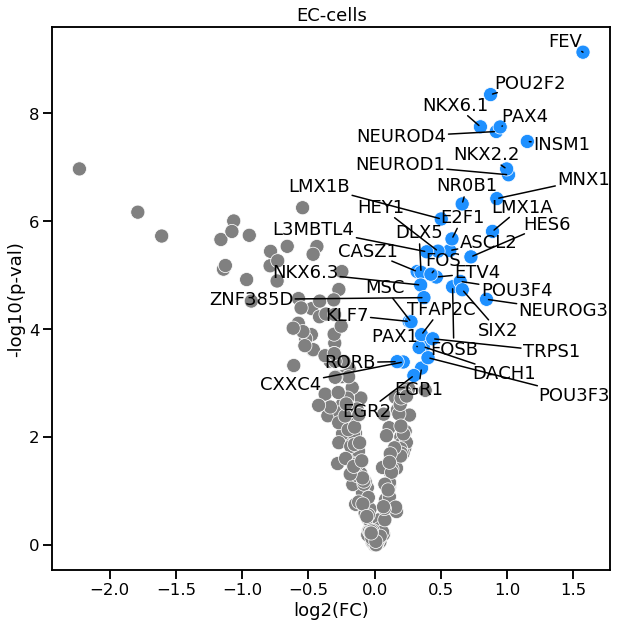

In [15]:
from adjustText import adjust_text
fig, ax = plt.subplots(figsize=(10,10))
sns.set_context("talk")
mypal=["grey","dodgerblue",]
pl=sns.scatterplot(x=df["log2(fold-change)"], y=-np.log10(df["log10(p-value)"]), hue=df["sig"],palette=mypal,s=200,legend=False)
#ax.set_xlim(-1.7,1.7)
ax.set_xlabel("log2(FC)")
ax.set_ylabel("-log10(p-val)")
ax.set_title("EC-cells")
text=[plt.text(df["log2(fold-change)"][idx], -np.log10(df["log10(p-value)"])[idx], genes[idx], ha='center', va="center") for idx in significant]
adjust_text(text, arrowprops=dict(arrowstyle='-', color='black'), ax=ax, precision=0.001)

# Day 4

In [2]:
base_dir = "/data/gl/g2/sachit/data/veres/perturbations/2_400_kegg_001500_seed_1_real/all_tfs/d4/"
filenames=os.listdir(base_dir)

In [3]:
files=[]
for elt in filenames:
    if "2-over" in elt:
        files.append(elt)
files.sort()

In [4]:
genes=[]
for elt in files:
    genes.append(elt.split("-")[0])

In [5]:
len(files)

263

In [7]:
differences=[]
paired_t=[]
beta_dist = []
for elt in files[0:2]:
    results=torch.load(base_dir+elt)
    beta_counts_std = []
    for labs in results["unperturbed_labs"]:
        beta_counts_std.append(Counter(labs[-1])["sc_beta"]/200)
    beta_counts_perturb = []
    for labs in results["perturbed_labs"]:
        beta_counts_perturb.append(Counter(labs[-1])["sc_beta"]/200)

    #beta_dist.append(np.array([beta_counts_std, beta_counts_perturb]))
    differences.append(np.array(beta_counts_perturb)/np.array(beta_counts_std))
    paired_t.append(scipy.stats.ttest_rel(np.array(beta_counts_perturb), np.array(beta_counts_std))[1])

In [8]:
torch.save({
    "gene_order": genes,
    "differences": differences,
    "p-val": paired_t
}, "/data/gl/g2/sachit/data/veres/perturbations/2_400_kegg_001500_seed_1_real/all_tfs_results/d4/beta_cell-2-over.pt")

In [9]:
beta=torch.load("/data/gl/g2/sachit/data/veres/perturbations/2_400_kegg_001500_seed_1_real/all_tfs_results/d4/beta_cell-2-over.pt")

In [10]:
genes=beta["gene_order"]
differences=beta["differences"]
paired_t=beta["p-val"]

In [11]:
df=pd.DataFrame({"log2(fold-change)": np.log2(np.average(differences, -1)), "log10(p-value)": paired_t, "genes":genes})

In [12]:
df

,log2(fold-change),log10(p-value),genes
0,0.002780,0.863831,ARX
1,-0.102322,0.008380,ASCL1
2,0.016085,0.508646,ASCL2
3,-0.055369,0.066229,ATF3
4,0.026203,0.222868,ATOH1
...,...,...,...
258,-0.042157,0.225950,ZNF703
259,0.028230,0.309233,ZNF732
260,0.011048,0.343436,ZNF750
261,0.006070,1.000000,ZNF774


In [18]:
df.loc[(df['log2(fold-change)'] >= .1) & (df['log10(p-value)'] <  0.001), 'sig'] = "over"  # upregulated
#df.loc[(df['log2(fold-change)'] <= -.5) & (df['log10(p-value)'] < 0.05), 'sig'] = "under"   # downregulated
#df.loc[df['log10(p-value)'] < 0.05, 'sig'] = "over"  # upregulated
#df.loc[df['log10(p-value)'] < 0.05, 'sig'] = "under"   # downregulated
df['sig'].fillna('na', inplace=True) # intermediate
significant=df.loc[df['log10(p-value)'] < 0.01].index
#significant=df.loc[(df["genes"]=="PAX4")].index

328

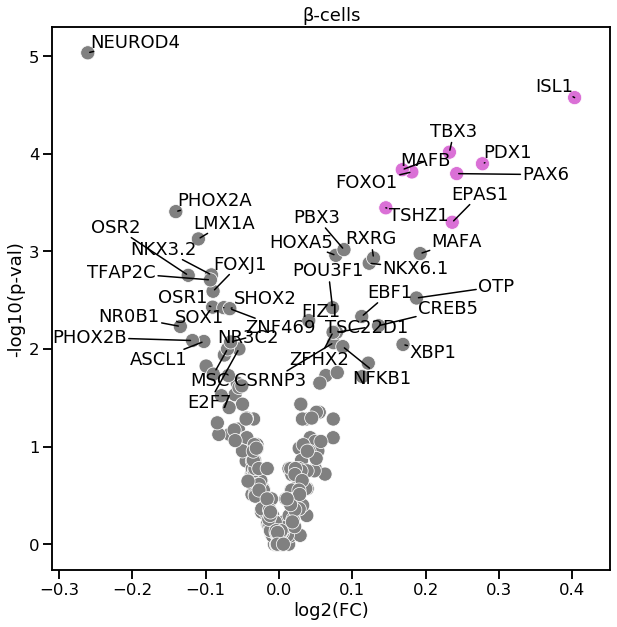

In [19]:
from adjustText import adjust_text
fig, ax = plt.subplots(figsize=(10,10))
sns.set_context("talk")
mypal=["grey","orchid",]
pl=sns.scatterplot(x=df["log2(fold-change)"], y=-np.log10(df["log10(p-value)"]), hue=df["sig"],palette=mypal,s=200,legend=False)
#ax.set_xlim(-1.7,1.7)
ax.set_xlabel("log2(FC)")
ax.set_ylabel("-log10(p-val)")
ax.set_title("β-cells")
text=[plt.text(df["log2(fold-change)"][idx], -np.log10(df["log10(p-value)"])[idx], genes[idx], ha='center', va="center") for idx in significant]
adjust_text(text, arrowprops=dict(arrowstyle='-', color='black'), ax=ax, precision=0.001)

In [20]:
differences=[]
paired_t=[]
beta_dist = []
for elt in files:
    results=torch.load(base_dir+elt)
    beta_counts_std = []
    for labs in results["unperturbed_labs"]:
        beta_counts_std.append(Counter(labs[-1])["sc_alpha"]/200)
    beta_counts_perturb = []
    for labs in results["perturbed_labs"]:
        beta_counts_perturb.append(Counter(labs[-1])["sc_alpha"]/200)

    #beta_dist.append(np.array([beta_counts_std, beta_counts_perturb]))
    differences.append(np.array(beta_counts_perturb)/np.array(beta_counts_std))
    paired_t.append(scipy.stats.ttest_rel(np.array(beta_counts_perturb), np.array(beta_counts_std))[1])

In [21]:
torch.save({
    "gene_order": genes,
    "differences": differences,
    "p-val": paired_t
}, "/data/gl/g2/sachit/data/veres/perturbations/2_400_kegg_001500_seed_1_real/all_tfs_results/d4/alpha_cell-2-over.pt")

In [22]:
alpha=torch.load("/data/gl/g2/sachit/data/veres/perturbations/2_400_kegg_001500_seed_1_real/all_tfs_results/d4/alpha_cell-2-over.pt")

In [23]:
genes=alpha["gene_order"]
differences=alpha["differences"]
paired_t=alpha["p-val"]

In [24]:
df=pd.DataFrame({"log2(fold-change)": np.log2(np.average(differences, -1)), "log10(p-value)": paired_t, "genes":genes})

In [29]:
df.loc[(df['log2(fold-change)'] >= .1) & (df['log10(p-value)'] <  0.001), 'sig'] = "over"  # upregulated
df['sig'].fillna('na', inplace=True) # intermediate
significant=df.loc[df['log10(p-value)'] < 0.01].index

45

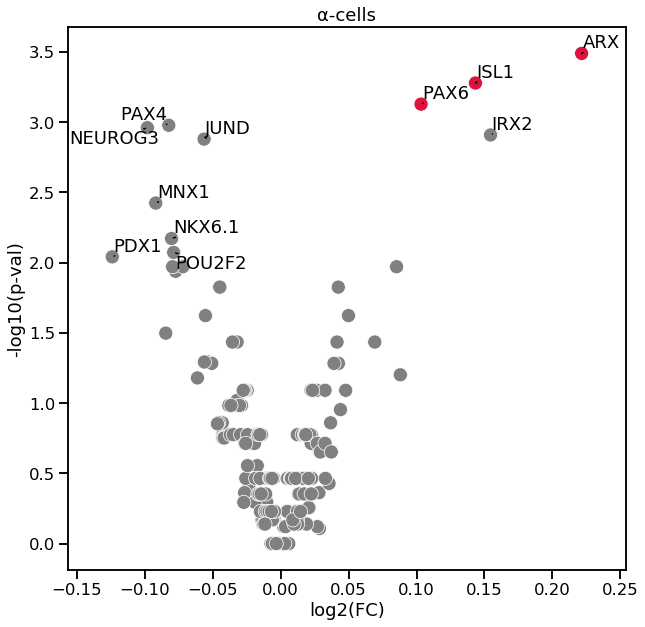

In [30]:
from adjustText import adjust_text
fig, ax = plt.subplots(figsize=(10,10))
sns.set_context("talk")
mypal=["crimson","grey"]
pl=sns.scatterplot(x=df["log2(fold-change)"], y=-np.log10(df["log10(p-value)"]), hue=df["sig"],palette=mypal,s=200,legend=False)
#ax.set_xlim(-1.7,1.7)
ax.set_xlabel("log2(FC)")
ax.set_ylabel("-log10(p-val)")
ax.set_title("α-cells")
text=[plt.text(df["log2(fold-change)"][idx], -np.log10(df["log10(p-value)"])[idx], genes[idx], ha='center', va="center") for idx in significant]
adjust_text(text, arrowprops=dict(arrowstyle='-', color='black'), ax=ax, precision=0.001)

In [31]:
differences=[]
paired_t=[]
beta_dist = []
for elt in files:
    results=torch.load(base_dir+elt)
    beta_counts_std = []
    for labs in results["unperturbed_labs"]:
        beta_counts_std.append(Counter(labs[-1])["sc_ec"]/200)
    beta_counts_perturb = []
    for labs in results["perturbed_labs"]:
        beta_counts_perturb.append(Counter(labs[-1])["sc_ec"]/200)

    #beta_dist.append(np.array([beta_counts_std, beta_counts_perturb]))
    differences.append(np.array(beta_counts_perturb)/np.array(beta_counts_std))
    paired_t.append(scipy.stats.ttest_rel(np.array(beta_counts_perturb), np.array(beta_counts_std))[1])

In [32]:
torch.save({
    "gene_order": genes,
    "differences": differences,
    "p-val": paired_t
}, "/data/gl/g2/sachit/data/veres/perturbations/2_400_kegg_001500_seed_1_real/all_tfs_results/d4/ec_cell-2-over.pt")

In [33]:
ec=torch.load("/data/gl/g2/sachit/data/veres/perturbations/2_400_kegg_001500_seed_1_real/all_tfs_results/d4/ec_cell-2-over.pt")

In [34]:
genes=ec["gene_order"]
differences=ec["differences"]
paired_t=ec["p-val"]

In [35]:
df=pd.DataFrame({"log2(fold-change)": np.log2(np.average(differences, -1)), "log10(p-value)": paired_t, "genes":genes})

In [36]:
df

,log2(fold-change),log10(p-value),genes
0,-0.160979,0.000445,ARX
1,-0.125363,0.000551,ASCL1
2,-0.030022,0.272912,ASCL2
3,0.017092,0.422572,ATF3
4,-0.014331,0.278873,ATOH1
...,...,...,...
258,0.092789,0.024256,ZNF703
259,0.006508,1.000000,ZNF732
260,-0.012684,0.661780,ZNF750
261,-0.026527,0.081126,ZNF774


In [39]:
df.loc[(df['log2(fold-change)'] >= .1) & (df['log10(p-value)'] <  0.001), 'sig'] = "over"  # upregulated
#df.loc[(df['log2(fold-change)'] <= -.5) & (df['log10(p-value)'] < 0.05), 'sig'] = "under"   # downregulated
#df.loc[df['log10(p-value)'] < 0.05, 'sig'] = "over"  # upregulated
#df.loc[df['log10(p-value)'] < 0.05, 'sig'] = "under"   # downregulated
df['sig'].fillna('na', inplace=True) # intermediate
significant=df.loc[df['log10(p-value)'] < 0.001].index
#significant=df.loc[(df["genes"]=="PAX4")].index

168

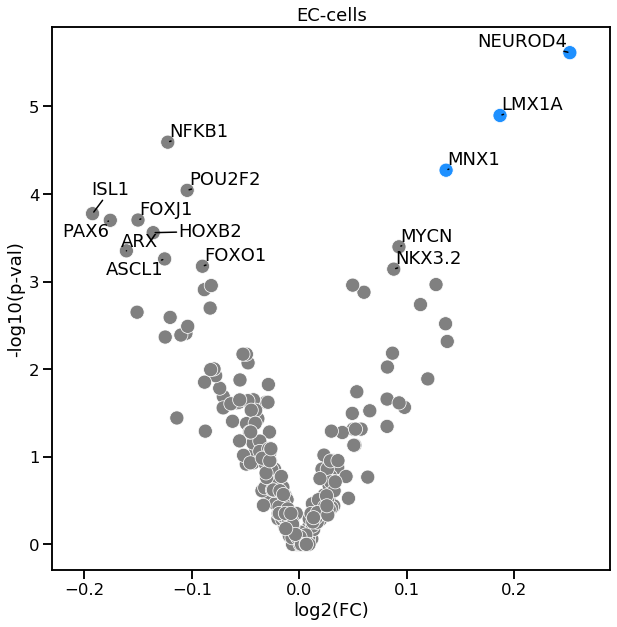

In [40]:
from adjustText import adjust_text
fig, ax = plt.subplots(figsize=(10,10))
sns.set_context("talk")
mypal=["grey","dodgerblue",]
pl=sns.scatterplot(x=df["log2(fold-change)"], y=-np.log10(df["log10(p-value)"]), hue=df["sig"],palette=mypal,s=200,legend=False)
#ax.set_xlim(-1.7,1.7)
ax.set_xlabel("log2(FC)")
ax.set_ylabel("-log10(p-val)")
ax.set_title("EC-cells")
text=[plt.text(df["log2(fold-change)"][idx], -np.log10(df["log10(p-value)"])[idx], genes[idx], ha='center', va="center") for idx in significant]
adjust_text(text, arrowprops=dict(arrowstyle='-', color='black'), ax=ax, precision=0.001)